# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
thit16 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2016.csv')
thit17 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2017.csv')
thit18 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2018.csv')
thit19 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2019.csv')
thit20 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2020.csv')
thit = pd.concat([thit16, thit17, thit18, thit19]).reset_index(drop=True)
thit = thit.sort_values(['GDAY_DS', 'T_ID'])
thit['GDAY_DS'] = pd.to_datetime(thit['GDAY_DS'].astype('str'))

tpit16 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2016.csv')
tpit17 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2017.csv')
tpit18 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2018.csv')
tpit19 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2019.csv')
tpit20 = pd.read_csv('2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2020.csv')
tpit = pd.concat([tpit16, tpit17, tpit18, tpit19]).reset_index(drop=True)
tpit = tpit.sort_values(['GDAY_DS', 'T_ID'])
tpit['GDAY_DS'] = pd.to_datetime(tpit['GDAY_DS'].astype('str'))

In [3]:
chit20 = pd.read_csv('chit20.csv')
cpit20 = pd.read_csv('cpit20.csv')

chit20 = chit20.drop(chit20[chit20.PA==0].index).reset_index(drop=True)
cpit20 = cpit20.drop(cpit20[cpit20.WLS=='0'].index).reset_index(drop=True)

thit20 = pd.concat([thit20, chit20]).sort_values('G_ID').reset_index(drop=True)
tpit20 = pd.concat([tpit20, cpit20]).sort_values('G_ID').reset_index(drop=True)

In [4]:
num_play = {'HH': [0,0], 'HT':[0,0], 'KT':[0,0], 'LG':[0,0], 'LT':[0,0], 'NC':[0,0],
        'OB':[0,0], 'SK':[0,0], 'SS':[0,0], 'WO':[0,0]}

In [5]:
remain = pd.read_excel('2020 KBO 정규시즌 잔여경기 현황_공지(200918).xlsx', sheet_name='잔여경기', skiprows=2)

In [6]:
remain['AWAY'].replace(['KIA','삼성','두산','롯데','키움','한화'],
                       ['HT','SS','OB','LT','WO','HH'], inplace=True)
remain['HOME'].replace(['KIA','삼성','두산','롯데','키움','한화'],
                       ['HT','SS','OB','LT','WO','HH'], inplace=True)
remain2 = remain.copy()
remain2['AWAY'] = remain['HOME']
remain2['HOME'] = remain['AWAY']
remain = pd.concat([remain,remain2])

In [7]:
for team in thit20['T_ID'].unique():
    num_play[team][0] = thit20[thit20['T_ID']==team].shape[0]-1
    num_play[team][1] = num_play[team][0]+remain[remain['HOME']==team].shape[0]-1

In [8]:
num_play # 첫번째 성분은 해당경기까지 진행한 것을 의미한다.
# 두번째 성분은 해당경기까지 진행을 해야함을 의미.

{'HH': [117, 142],
 'HT': [114, 142],
 'KT': [116, 142],
 'LG': [118, 142],
 'LT': [115, 142],
 'NC': [115, 142],
 'OB': [118, 142],
 'SK': [119, 142],
 'SS': [117, 142],
 'WO': [123, 142]}

In [9]:
thit20 = thit20.assign(HIT_CUM=None, AB_CUM=None, AVG=None)
tpit20 = tpit20.assign(ER_CUM=None, INN2_CUM=None, ERA=None, WLS_CUM=None, ROUND=None, W_RATE=None)
thit20 = thit20.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
tpit20 = tpit20.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
WLS = {'W':1, 'L':0, 'D':0}
f = lambda x: WLS.get(x, x)
tpit20['WLS'] = tpit20['WLS'].map(f)
sum = 0
sum_list = [sum]
for element in (thit20.groupby(['T_ID']).count()['G_ID']):
    sum += element
    sum_list.append(sum)
for i in range(10):
    j = sum_list
    thit20.iloc[j[i]:j[i+1], thit20.columns.get_loc('HIT_CUM')] = thit20.iloc[j[i]:j[i+1], thit20.columns.get_loc('HIT')].cumsum()
    thit20.iloc[j[i]:j[i+1], thit20.columns.get_loc('AB_CUM')] = thit20.iloc[j[i]:j[i+1], thit20.columns.get_loc('AB')].cumsum()
    thit20.iloc[j[i]:j[i+1], thit20.columns.get_loc('AVG')] = thit20.iloc[j[i]:j[i+1], thit20.columns.get_loc('HIT_CUM')] / thit20.iloc[j[i]:j[i+1], thit20.columns.get_loc('AB_CUM')]
    tpit20.iloc[j[i]:j[i+1], tpit20.columns.get_loc('ER_CUM')] = tpit20.iloc[j[i]:j[i+1], tpit20.columns.get_loc('ER')].cumsum()
    tpit20.iloc[j[i]:j[i+1], tpit20.columns.get_loc('INN2_CUM')] = tpit20.iloc[j[i]:j[i+1], tpit20.columns.get_loc('INN2')].cumsum()
    tpit20.iloc[j[i]:j[i+1], tpit20.columns.get_loc('ERA')] = (9*tpit20.iloc[j[i]:j[i+1], tpit20.columns.get_loc('ER_CUM')]) / (tpit20.iloc[j[i]:j[i+1], tpit20.columns.get_loc('INN2_CUM')]/3)
    tpit20.iloc[j[i]:j[i+1], tpit20.columns.get_loc('WLS_CUM')] = tpit20.iloc[j[i]:j[i+1], tpit20.columns.get_loc('WLS')].cumsum()
    tpit20.iloc[j[i]:j[i+1], tpit20.columns.get_loc('ROUND')] = range(1, j[i+1]-j[i]+1)
    tpit20.iloc[j[i]:j[i+1], tpit20.columns.get_loc('W_RATE')] = tpit20.iloc[j[i]:j[i+1], tpit20.columns.get_loc('WLS_CUM')] / tpit20.iloc[j[i]:j[i+1], tpit20.columns.get_loc('ROUND')]
    
t20 = pd.merge(thit20[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'AVG']],
              tpit20[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'ERA', 'W_RATE', 'WLS']]).sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
t20 = t20.sort_values('G_ID').reset_index(drop=True)
t20 = t20.assign(AVG_1=None, ERA_1=None)
t20 = t20.sort_values(['T_ID','GDAY_DS']).reset_index(drop=True)

for i in range(t20.shape[0]-1):
    t20.iloc[i+1, t20.columns.get_loc('AVG_1')] = t20.iloc[i, t20.columns.get_loc('AVG')]
    t20.iloc[i+1, t20.columns.get_loc('ERA_1')] = t20.iloc[i, t20.columns.get_loc('ERA')]

t20 = t20.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
t20 = t20.groupby(['T_ID']).apply(lambda group: group.iloc[1:]).reset_index(drop=True)

# Data Preprocessing

### 누적 타율, 방어율 계산

In [10]:
def data_preprocessing(hit,pit):
    thit_yy = hit.copy(); tpit_yy = pit.copy()
    thit_yy = thit_yy.assign(HIT_CUM=None, AB_CUM=None, AVG=None)
    tpit_yy = tpit_yy.assign(ER_CUM=None, INN2_CUM=None, ERA=None, WLS_CUM=None, ROUND=None, W_RATE=None)
    thit_yy = thit_yy.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
    tpit_yy = tpit_yy.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
    WLS = {'W':1, 'L':0, 'D':0}
    f = lambda x: WLS.get(x, x)
    tpit_yy['WLS'] = tpit_yy['WLS'].map(f)
    for i in [144*n for n in range(10)]:
        thit_yy.iloc[i:i+144, thit_yy.columns.get_loc('HIT_CUM')] = thit_yy.iloc[i:i+144, thit_yy.columns.get_loc('HIT')].cumsum()
        thit_yy.iloc[i:i+144, thit_yy.columns.get_loc('AB_CUM')] = thit_yy.iloc[i:i+144, thit_yy.columns.get_loc('AB')].cumsum()
        thit_yy.iloc[i:i+144, thit_yy.columns.get_loc('AVG')] = thit_yy.iloc[i:i+144, thit_yy.columns.get_loc('HIT_CUM')] / thit_yy.iloc[i:i+144, thit_yy.columns.get_loc('AB_CUM')]
        tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('ER_CUM')] = tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('ER')].cumsum()
        tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('INN2_CUM')] = tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('INN2')].cumsum()
        tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('ERA')] = (9*tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('ER_CUM')]) / (tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('INN2_CUM')]/3)
        tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('WLS_CUM')] = tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('WLS')].cumsum()
        tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('ROUND')] = range(1, 145)
        tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('W_RATE')] = tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('WLS_CUM')] / tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('ROUND')]
        
    t_yy = pd.merge(thit_yy[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID','AVG']],
              tpit_yy[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'ERA', 'W_RATE', 'WLS']]).sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
    t_yy = t_yy.sort_values('G_ID').reset_index(drop=True)
    t_yy = t_yy.assign(AVG_1=None, ERA_1=None, VS_AVG_1=None, VS_ERA_1=None)
    t_yy = t_yy.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)

    for i in range(1439):
        t_yy.iloc[i+1, t_yy.columns.get_loc('AVG_1')] = t_yy.iloc[i, t_yy.columns.get_loc('AVG')]
        t_yy.iloc[i+1, t_yy.columns.get_loc('ERA_1')] = t_yy.iloc[i, t_yy.columns.get_loc('ERA')]

    t_yy = t_yy.sort_values(['VS_T_ID', 'GDAY_DS']).reset_index(drop=True)
    t_yy = t_yy.drop([144*n for n in range(10)]).sort_values(['G_ID']).reset_index(drop=True)
    return(t_yy)

In [11]:
t16 = data_preprocessing(thit16,tpit16)
t17 = data_preprocessing(thit17,tpit17)
t18 = data_preprocessing(thit18,tpit18)
t19 = data_preprocessing(thit19,tpit19)

# AVG ~ AVG_1: 누적타율예측

### 모델학습

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [13]:
def AVG(t,team, start, end):
    t = t.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
    XX = t[t['T_ID']==team].reset_index(drop=True)
    X_train = XX.iloc[40:start, [XX.columns.get_loc('AVG_1')]].reset_index(drop=True).astype('float')
    y_train = XX.iloc[40:start, XX.columns.get_loc('AVG')].reset_index(drop=True).astype('float')
    X_test = pd.DataFrame([y_train.iloc[start-41]], columns=['AVG_1']).astype('float')
    
    for i in range(start-40, end-40):
        xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0.5, max_depth=1, boosting='glinear',
                           random_state=123,objective='reg:squarederror')
        xgb.fit(X_train, y_train)
        X_train = pd.concat([X_train, pd.DataFrame([y_train.iloc[i-1]], columns=['AVG_1'])]).reset_index(drop=True)
        y_train = pd.concat([y_train, pd.Series(xgb.predict(X_test))]).reset_index(drop=True)
        X_test = pd.DataFrame([y_train.iloc[i]], columns=['AVG_1'])
    AVG_pred = pd.concat([y_train, pd.DataFrame(xgb.predict(X_test))]).reset_index(drop=True)
    AVG_pred.columns = ['AVG(pred)']
    AVG_pred = pd.concat([XX.iloc[40:end+1, XX.columns.get_loc('AVG')].reset_index(drop=True), AVG_pred], axis=1)
    return AVG_pred

In [14]:
AVG_var_names_20 = 'AVG_pred_'+t19['T_ID'].unique()+'_20'

for var_name in AVG_var_names_20:
    team_name = var_name[9:11]
    year = vars()['t'+var_name[12:14]]
    globals()[var_name] = AVG(year,team_name,num_play[team_name][0],num_play[team_name][1])

In [15]:
def AVG_TOTAL(year):
    team = t19['T_ID'].unique()
    for name in team:
        globals()['AVG_pred_'+name] = globals()['AVG_pred_'+name+'_'+year]
    total = pd.concat([pd.DataFrame([AVG_pred_OB.iloc[-1, 0], AVG_pred_NC.iloc[-1, 0], AVG_pred_LG.iloc[-1, 0], AVG_pred_KT.iloc[-1, 0],
                                     AVG_pred_LT.iloc[-1, 0], AVG_pred_HT.iloc[-1, 0], AVG_pred_SS.iloc[-1, 0], AVG_pred_WO.iloc[-1, 0],
                                     AVG_pred_SK.iloc[-1, 0], AVG_pred_HH.iloc[-1, 0]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['AVG(end)']),
                      pd.DataFrame([AVG_pred_OB.iloc[-1, 1], AVG_pred_NC.iloc[-1, 1], AVG_pred_LG.iloc[-1, 1], AVG_pred_KT.iloc[-1, 1],
                                    AVG_pred_LT.iloc[-1, 1], AVG_pred_HT.iloc[-1, 1], AVG_pred_SS.iloc[-1, 1], AVG_pred_WO.iloc[-1, 1],
                                    AVG_pred_SK.iloc[-1, 1], AVG_pred_HH.iloc[-1, 1]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['AVG_pred(end)']),
                       pd.DataFrame([AVG_pred_OB.iloc[num_play['OB'][0]-41, 1], AVG_pred_NC.iloc[num_play['NC'][0]-41, 1], AVG_pred_LG.iloc[num_play['LG'][0]-41, 1], AVG_pred_KT.iloc[num_play['KT'][0]-41, 1],
                                    AVG_pred_LT.iloc[num_play['LT'][0]-41, 1], AVG_pred_HT.iloc[num_play['HT'][0]-41, 1], AVG_pred_SS.iloc[num_play['SS'][0]-41, 1], AVG_pred_WO.iloc[num_play['WO'][0]-41, 1],
                                    AVG_pred_SK.iloc[num_play['SK'][0]-41, 1], AVG_pred_HH.iloc[num_play['HH'][0]-41, 1]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['AVG_pred(start)'])], axis=1)
    return(total)

In [16]:
AVG_TOTAL('20')

,AVG(end),AVG_pred(end),AVG_pred(start)
OB,NaN,0.290015,0.273724
NC,NaN,0.283650,0.277036
LG,NaN,0.280597,0.269673
KT,NaN,0.281319,0.265867
LT,NaN,0.267279,0.258790
HT,NaN,0.265601,0.255571
SS,NaN,0.261129,0.253141
WO,NaN,0.265147,0.257673
SK,NaN,0.236529,0.227696
HH,NaN,0.229313,0.222665


#### polynomial regression

In [17]:
def AVG_LR1(t, team, start, end):
    t = t.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
    XX = t[t['T_ID']==team].reset_index(drop=True)
    X_train = pd.DataFrame(XX.iloc[40:start, [XX.columns.get_loc('AVG_1')]].index, columns=['INDEX'])
    y_train = XX.iloc[40:start, XX.columns.get_loc('AVG')].reset_index(drop=True)
    X_test = pd.DataFrame(range(start, end+1), columns=['INDEX'])
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    AVG_pred_LR1 = pd.concat([XX.iloc[40:start, XX.columns.get_loc('AVG')].reset_index(drop=True), pd.DataFrame(lr.predict(X_test))]).reset_index(drop=True)
    AVG_pred_LR1.columns = ['AVG(LR1)']
    AVG_pred_LR1 = pd.concat([XX.iloc[40:end+1, XX.columns.get_loc('AVG')].reset_index(drop=True), AVG_pred_LR1], axis=1)
    return AVG_pred_LR1

In [18]:
def AVG_LR2(t, team, start, end):
    t = t.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
    XX = t[t['T_ID']==team].reset_index(drop=True)
    X_train = pd.DataFrame(XX.iloc[start-10:start, [XX.columns.get_loc('AVG_1')]].index, columns=['INDEX'])
    y_train = XX.iloc[start-10:start, XX.columns.get_loc('AVG')].reset_index(drop=True)
    X_test = pd.DataFrame(range(start, end+1), columns=['INDEX'])
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    AVG_pred_LR2 = pd.concat([XX.iloc[40:start, XX.columns.get_loc('AVG')].reset_index(drop=True), pd.DataFrame(lr.predict(X_test))]).reset_index(drop=True)
    AVG_pred_LR2.columns = ['AVG(LR2)']
    AVG_pred_LR2 = pd.concat([XX.iloc[40:end+1, XX.columns.get_loc('AVG')].reset_index(drop=True), AVG_pred_LR2], axis=1)
    return AVG_pred_LR2

In [19]:
var_names = 'AVG_pred_LR1_' + t19['T_ID'].unique()
for var_name in var_names:
    team_name = var_name[13:15]
    globals()[var_name] = AVG_LR1(t20, team_name, num_play[team_name][0], num_play[team_name][1])

In [20]:
var_names = 'AVG_pred_LR2_' + t19['T_ID'].unique()
for var_name in var_names:
    team_name = var_name[13:15]
    globals()[var_name] = AVG_LR2(t20, team_name, num_play[team_name][0], num_play[team_name][1])

In [21]:
AVG_MEAN_OB = pd.concat([AVG_pred_OB, AVG_pred_LR1_OB['AVG(LR1)'], AVG_pred_LR2_OB['AVG(LR2)']], axis=1)
AVG_MEAN_OB['AVG(mean)'] = (AVG_MEAN_OB['AVG(pred)'] + AVG_MEAN_OB['AVG(LR1)'] + AVG_MEAN_OB['AVG(LR2)'])/3
AVG_MEAN_NC = pd.concat([AVG_pred_NC, AVG_pred_LR1_NC['AVG(LR1)'], AVG_pred_LR2_NC['AVG(LR2)']], axis=1)
AVG_MEAN_NC['AVG(mean)'] = (AVG_MEAN_NC['AVG(pred)'] + AVG_MEAN_NC['AVG(LR1)'] + AVG_MEAN_NC['AVG(LR2)'])/3
AVG_MEAN_LG = pd.concat([AVG_pred_LG, AVG_pred_LR1_LG['AVG(LR1)'], AVG_pred_LR2_LG['AVG(LR2)']], axis=1)
AVG_MEAN_LG['AVG(mean)'] = (AVG_MEAN_LG['AVG(pred)'] + AVG_MEAN_LG['AVG(LR1)'] + AVG_MEAN_LG['AVG(LR2)'])/3
AVG_MEAN_KT = pd.concat([AVG_pred_KT, AVG_pred_LR1_KT['AVG(LR1)'], AVG_pred_LR2_KT['AVG(LR2)']], axis=1)
AVG_MEAN_KT['AVG(mean)'] = (AVG_MEAN_KT['AVG(pred)'] + AVG_MEAN_KT['AVG(LR1)'] + AVG_MEAN_KT['AVG(LR2)'])/3
AVG_MEAN_LT = pd.concat([AVG_pred_LT, AVG_pred_LR1_LT['AVG(LR1)'], AVG_pred_LR2_LT['AVG(LR2)']], axis=1)
AVG_MEAN_LT['AVG(mean)'] = (AVG_MEAN_LT['AVG(pred)'] + AVG_MEAN_LT['AVG(LR1)'] + AVG_MEAN_LT['AVG(LR2)'])/3
AVG_MEAN_HT = pd.concat([AVG_pred_HT, AVG_pred_LR1_HT['AVG(LR1)'], AVG_pred_LR2_HT['AVG(LR2)']], axis=1)
AVG_MEAN_HT['AVG(mean)'] = (AVG_MEAN_HT['AVG(pred)'] + AVG_MEAN_HT['AVG(LR1)'] + AVG_MEAN_HT['AVG(LR2)'])/3
AVG_MEAN_SS = pd.concat([AVG_pred_SS, AVG_pred_LR1_SS['AVG(LR1)'], AVG_pred_LR2_SS['AVG(LR2)']], axis=1)
AVG_MEAN_SS['AVG(mean)'] = (AVG_MEAN_SS['AVG(pred)'] + AVG_MEAN_SS['AVG(LR1)'] + AVG_MEAN_SS['AVG(LR2)'])/3
AVG_MEAN_WO = pd.concat([AVG_pred_WO, AVG_pred_LR1_WO['AVG(LR1)'], AVG_pred_LR2_WO['AVG(LR2)']], axis=1)
AVG_MEAN_WO['AVG(mean)'] = (AVG_MEAN_WO['AVG(pred)'] + AVG_MEAN_WO['AVG(LR1)'] + AVG_MEAN_WO['AVG(LR2)'])/3
AVG_MEAN_SK = pd.concat([AVG_pred_SK, AVG_pred_LR1_SK['AVG(LR1)'], AVG_pred_LR2_SK['AVG(LR2)']], axis=1)
AVG_MEAN_SK['AVG(mean)'] = (AVG_MEAN_SK['AVG(pred)'] + AVG_MEAN_SK['AVG(LR1)'] + AVG_MEAN_SK['AVG(LR2)'])/3
AVG_MEAN_HH = pd.concat([AVG_pred_HH, AVG_pred_LR1_HH['AVG(LR1)'], AVG_pred_LR2_HH['AVG(LR2)']], axis=1)
AVG_MEAN_HH['AVG(mean)'] = (AVG_MEAN_HH['AVG(pred)'] + AVG_MEAN_HH['AVG(LR1)'] + AVG_MEAN_HH['AVG(LR2)'])/3

In [22]:
AVG_TOTAL2 = pd.concat([pd.DataFrame([AVG_MEAN_OB.iloc[-1, 0], AVG_MEAN_NC.iloc[-1, 0], AVG_MEAN_LG.iloc[-1, 0], AVG_MEAN_KT.iloc[-1, 0],
                                    AVG_MEAN_LT.iloc[-1, 0], AVG_MEAN_HT.iloc[-1, 0], AVG_MEAN_SS.iloc[-1, 0], AVG_MEAN_WO.iloc[-1, 0],
                                    AVG_MEAN_SK.iloc[-1, 0], AVG_MEAN_HH.iloc[-1, 0]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['AVG']),
                       pd.DataFrame([AVG_MEAN_OB.iloc[-1, 1], AVG_MEAN_NC.iloc[-1, 1], AVG_MEAN_LG.iloc[-1, 1], AVG_MEAN_KT.iloc[-1, 1],
                                    AVG_MEAN_LT.iloc[-1, 1], AVG_MEAN_HT.iloc[-1, 1], AVG_MEAN_SS.iloc[-1, 1], AVG_MEAN_WO.iloc[-1, 1],
                                    AVG_MEAN_SK.iloc[-1, 1], AVG_MEAN_HH.iloc[-1, 1]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['AVG(pred)']),
                       pd.DataFrame([AVG_MEAN_OB.iloc[-1, 2], AVG_MEAN_NC.iloc[-1, 2], AVG_MEAN_LG.iloc[-1, 2], AVG_MEAN_KT.iloc[-1, 2],
                                    AVG_MEAN_LT.iloc[-1, 2], AVG_MEAN_HT.iloc[-1, 2], AVG_MEAN_SS.iloc[-1, 2], AVG_MEAN_WO.iloc[-1, 2],
                                    AVG_MEAN_SK.iloc[-1, 2], AVG_MEAN_HH.iloc[-1, 2]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['AVG(LR1)']),
                       pd.DataFrame([AVG_MEAN_OB.iloc[-1, 3], AVG_MEAN_NC.iloc[-1, 3], AVG_MEAN_LG.iloc[-1, 3], AVG_MEAN_KT.iloc[-1, 3],
                                    AVG_MEAN_LT.iloc[-1, 3], AVG_MEAN_HT.iloc[-1, 3], AVG_MEAN_SS.iloc[-1, 3], AVG_MEAN_WO.iloc[-1, 3],
                                    AVG_MEAN_SK.iloc[-1, 3], AVG_MEAN_HH.iloc[-1, 3]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['AVG(LR2)']),
                       pd.DataFrame([AVG_MEAN_OB.iloc[-1, 4], AVG_MEAN_NC.iloc[-1, 4], AVG_MEAN_LG.iloc[-1, 4], AVG_MEAN_KT.iloc[-1, 4],
                                    AVG_MEAN_LT.iloc[-1, 4], AVG_MEAN_HT.iloc[-1, 4], AVG_MEAN_SS.iloc[-1, 4], AVG_MEAN_WO.iloc[-1, 4],
                                    AVG_MEAN_SK.iloc[-1, 4], AVG_MEAN_HH.iloc[-1, 4]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['AVG(mean)'])], axis=1)
AVG_TOTAL2

,AVG,AVG(pred),AVG(LR1),AVG(LR2),AVG(mean)
OB,NaN,0.290015,0.267857,0.257359,0.271744
NC,NaN,0.283650,0.264937,0.281326,0.276637
LG,NaN,0.280597,0.267333,0.262240,0.270057
KT,NaN,0.281319,0.250772,0.259343,0.263811
LT,NaN,0.267279,0.253655,0.254400,0.258444
HT,NaN,0.265601,0.243180,0.246760,0.251847
SS,NaN,0.261129,0.249221,0.253133,0.254494
WO,NaN,0.265147,0.253533,0.264521,0.261067
SK,NaN,0.236529,0.224412,0.211969,0.224303
HH,NaN,0.229313,0.207933,0.235957,0.224401


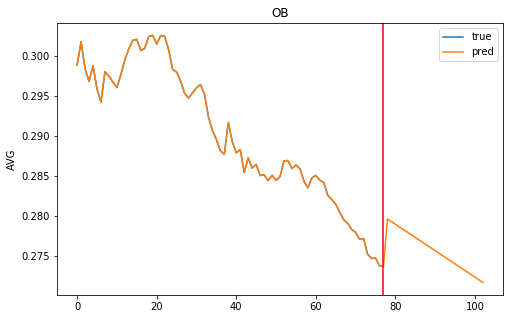

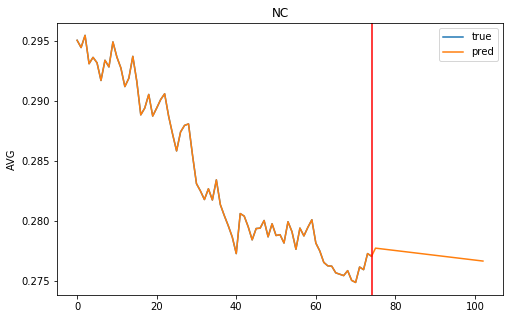

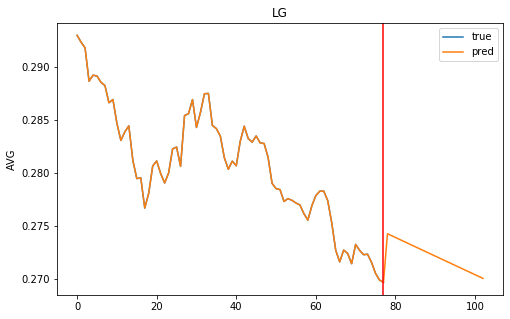

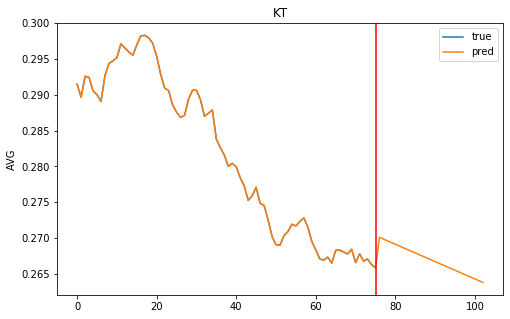

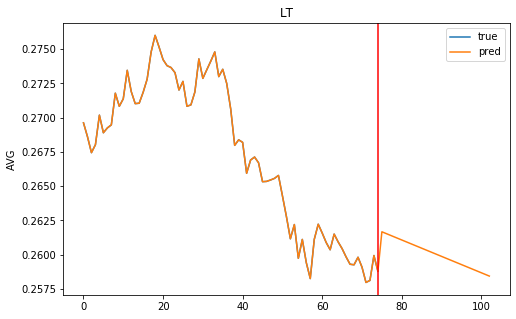

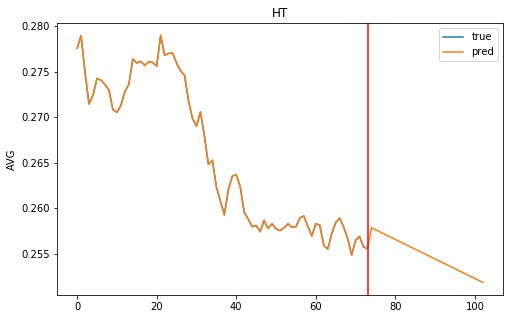

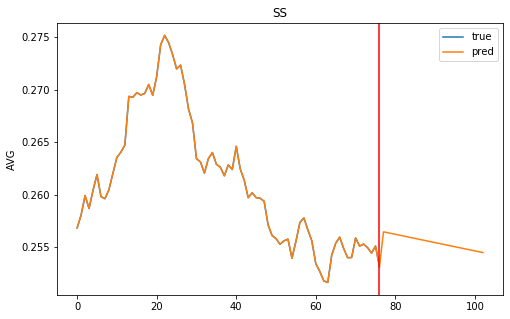

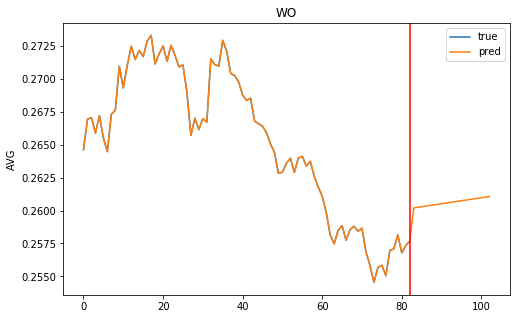

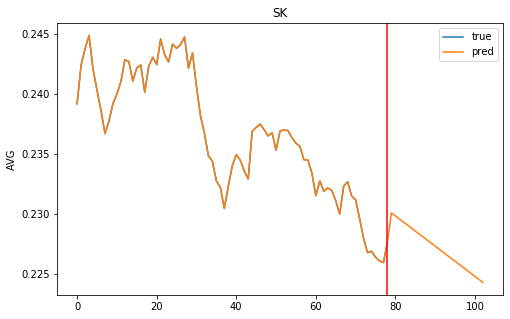

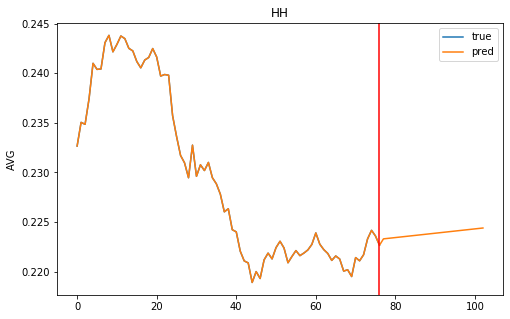

In [23]:
for i in AVG_TOTAL('20').index:
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(vars()['AVG_MEAN_'+i]['AVG'], label='true')
    ax.plot(vars()['AVG_MEAN_'+i]['AVG(mean)'], label='pred')
    ax.axvline(num_play[i][0]-41, color='red')
    ax.legend()
    ax.set_title(i)
    ax.set_ylabel('AVG')
    plt.show()

# ERA ~ ERA_1: 누적방어율예측

### 모델학습

In [24]:
def ERA(t,team, start, end):
    t = t.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
    XX = t[t['T_ID']==team].reset_index(drop=True)
    X_train = XX.iloc[40:start, [XX.columns.get_loc('ERA_1')]].reset_index(drop=True).astype('float')
    y_train = XX.iloc[40:start, XX.columns.get_loc('ERA')].reset_index(drop=True).astype('float')
    X_test = pd.DataFrame([y_train.iloc[start-41]], columns=['ERA_1']).astype('float')
    for i in range(start-40, end-40):
        xgb = XGBRegressor(n_estimators=200, learning_rate=0.15, gamma=0.5, max_depth=1, boosting='glinear',
                           random_state=123,objective='reg:squarederror')
        xgb.fit(X_train, y_train)
        X_train = pd.concat([X_train, pd.DataFrame([y_train.iloc[i-1]], columns=['ERA_1'])]).reset_index(drop=True)
        y_train = pd.concat([y_train, pd.Series(xgb.predict(X_test))]).reset_index(drop=True)
        X_test = pd.DataFrame([y_train.iloc[i]], columns=['ERA_1'])
    ERA_pred = pd.concat([y_train, pd.DataFrame(xgb.predict(X_test))]).reset_index(drop=True)
    ERA_pred.columns = ['ERA(pred)']
    ERA_pred = pd.concat([XX.iloc[40:end+1, XX.columns.get_loc('ERA')].reset_index(drop=True), ERA_pred], axis=1)
    return ERA_pred

In [25]:
ERA_var_names_20 = 'ERA_pred_'+t19['T_ID'].unique()+'_20'

for var_name in ERA_var_names_20:
    team_name = var_name[9:11]
    year = vars()['t'+var_name[12:14]]
    globals()[var_name] = ERA(year,team_name,num_play[team_name][0],num_play[team_name][1])

In [26]:
def ERA_TOTAL(year):
    team = t19['T_ID'].unique()
    for name in team:
        globals()['ERA_pred_'+name] = globals()['ERA_pred_'+name+'_'+year]
    total = pd.concat([pd.DataFrame([ERA_pred_OB.iloc[-1, 0], ERA_pred_NC.iloc[-1, 0], ERA_pred_LG.iloc[-1, 0], ERA_pred_KT.iloc[-1, 0],
                                     ERA_pred_LT.iloc[-1, 0], ERA_pred_HT.iloc[-1, 0], ERA_pred_SS.iloc[-1, 0], ERA_pred_WO.iloc[-1, 0],
                                     ERA_pred_SK.iloc[-1, 0], ERA_pred_HH.iloc[-1, 0]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['ERA(end)']),
                      pd.DataFrame([ERA_pred_OB.iloc[-1, 1], ERA_pred_NC.iloc[-1, 1], ERA_pred_LG.iloc[-1, 1], ERA_pred_KT.iloc[-1, 1],
                                    ERA_pred_LT.iloc[-1, 1], ERA_pred_HT.iloc[-1, 1], ERA_pred_SS.iloc[-1, 1], ERA_pred_WO.iloc[-1, 1],
                                    ERA_pred_SK.iloc[-1, 1], ERA_pred_HH.iloc[-1, 1]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['ERA_pred(end)']),
                       pd.DataFrame([ERA_pred_OB.iloc[num_play['OB'][0]-41, 1], ERA_pred_NC.iloc[num_play['NC'][0]-41, 1], ERA_pred_LG.iloc[num_play['LG'][0]-41, 1], ERA_pred_KT.iloc[num_play['KT'][0]-41, 1],
                                    ERA_pred_LT.iloc[num_play['LT'][0]-41, 1], ERA_pred_HT.iloc[num_play['HT'][0]-41, 1], ERA_pred_SS.iloc[num_play['SS'][0]-41, 1], ERA_pred_WO.iloc[num_play['WO'][0]-41, 1],
                                    ERA_pred_SK.iloc[num_play['SK'][0]-41, 1], ERA_pred_HH.iloc[num_play['HH'][0]-41, 1]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['ERA_pred(start)'])], axis=1)
    return(total)

In [27]:
ERA_TOTAL('20')

,ERA(end),ERA_pred(end),ERA_pred(start)
OB,NaN,4.772200,4.540871
NC,NaN,4.636755,4.578897
LG,NaN,4.571726,4.497182
KT,NaN,4.818411,4.608917
LT,NaN,4.644338,4.662686
HT,NaN,4.624108,4.837945
SS,NaN,4.671729,4.994521
WO,NaN,4.435282,4.417294
SK,NaN,5.554203,5.659764
HH,NaN,5.422543,5.198650


#### polynomial regression

In [28]:
def ERA_LR1(t, team, start, end):
    t = t.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
    XX = t[t['T_ID']==team].reset_index(drop=True)
    X_train = pd.DataFrame(XX.iloc[40:start, [XX.columns.get_loc('ERA_1')]].index, columns=['INDEX'])
    y_train = XX.iloc[40:start, XX.columns.get_loc('ERA')].reset_index(drop=True)
    X_test = pd.DataFrame(range(start, end+1), columns=['INDEX'])
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    ERA_pred_LR1 = pd.concat([XX.iloc[40:start, XX.columns.get_loc('ERA')].reset_index(drop=True), pd.DataFrame(lr.predict(X_test))]).reset_index(drop=True)
    ERA_pred_LR1.columns = ['ERA(LR1)']
    ERA_pred_LR1 = pd.concat([XX.iloc[40:end+1, XX.columns.get_loc('ERA')].reset_index(drop=True), ERA_pred_LR1], axis=1)
    return ERA_pred_LR1

In [29]:
def ERA_LR2(t, team, start, end):
    t = t.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
    XX = t[t['T_ID']==team].reset_index(drop=True)
    X_train = pd.DataFrame(XX.iloc[start-10:start, [XX.columns.get_loc('ERA_1')]].index, columns=['INDEX'])
    y_train = XX.iloc[start-10:start, XX.columns.get_loc('ERA')].reset_index(drop=True)
    X_test = pd.DataFrame(range(start, end+1), columns=['INDEX'])
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    ERA_pred_LR2 = pd.concat([XX.iloc[40:start, XX.columns.get_loc('ERA')].reset_index(drop=True), pd.DataFrame(lr.predict(X_test))]).reset_index(drop=True)
    ERA_pred_LR2.columns = ['ERA(LR2)']
    ERA_pred_LR2 = pd.concat([XX.iloc[40:end+1, XX.columns.get_loc('ERA')].reset_index(drop=True), ERA_pred_LR2], axis=1)
    return ERA_pred_LR2

In [30]:
var_names = 'ERA_pred_LR1_' + t19['T_ID'].unique()
for var_name in var_names:
    team_name = var_name[13:15]
    globals()[var_name] = ERA_LR1(t20, team_name, num_play[team_name][0], num_play[team_name][1])

In [31]:
var_names = 'ERA_pred_LR2_' + t19['T_ID'].unique()
for var_name in var_names:
    team_name = var_name[13:15]
    globals()[var_name] = ERA_LR2(t20, team_name, num_play[team_name][0], num_play[team_name][1])

In [32]:
ERA_MEAN_OB = pd.concat([ERA_pred_OB, ERA_pred_LR1_OB['ERA(LR1)'], ERA_pred_LR2_OB['ERA(LR2)']], axis=1)
ERA_MEAN_OB['ERA(mean)'] = (ERA_MEAN_OB['ERA(pred)'] + ERA_MEAN_OB['ERA(LR1)'] + ERA_MEAN_OB['ERA(LR2)'])/3
ERA_MEAN_NC = pd.concat([ERA_pred_NC, ERA_pred_LR1_NC['ERA(LR1)'], ERA_pred_LR2_NC['ERA(LR2)']], axis=1)
ERA_MEAN_NC['ERA(mean)'] = (ERA_MEAN_NC['ERA(pred)'] + ERA_MEAN_NC['ERA(LR1)'] + ERA_MEAN_NC['ERA(LR2)'])/3
ERA_MEAN_LG = pd.concat([ERA_pred_LG, ERA_pred_LR1_LG['ERA(LR1)'], ERA_pred_LR2_LG['ERA(LR2)']], axis=1)
ERA_MEAN_LG['ERA(mean)'] = (ERA_MEAN_LG['ERA(pred)'] + ERA_MEAN_LG['ERA(LR1)'] + ERA_MEAN_LG['ERA(LR2)'])/3
ERA_MEAN_KT = pd.concat([ERA_pred_KT, ERA_pred_LR1_KT['ERA(LR1)'], ERA_pred_LR2_KT['ERA(LR2)']], axis=1)
ERA_MEAN_KT['ERA(mean)'] = (ERA_MEAN_KT['ERA(pred)'] + ERA_MEAN_KT['ERA(LR1)'] + ERA_MEAN_KT['ERA(LR2)'])/3
ERA_MEAN_LT = pd.concat([ERA_pred_LT, ERA_pred_LR1_LT['ERA(LR1)'], ERA_pred_LR2_LT['ERA(LR2)']], axis=1)
ERA_MEAN_LT['ERA(mean)'] = (ERA_MEAN_LT['ERA(pred)'] + ERA_MEAN_LT['ERA(LR1)'] + ERA_MEAN_LT['ERA(LR2)'])/3
ERA_MEAN_HT = pd.concat([ERA_pred_HT, ERA_pred_LR1_HT['ERA(LR1)'], ERA_pred_LR2_HT['ERA(LR2)']], axis=1)
ERA_MEAN_HT['ERA(mean)'] = (ERA_MEAN_HT['ERA(pred)'] + ERA_MEAN_HT['ERA(LR1)'] + ERA_MEAN_HT['ERA(LR2)'])/3
ERA_MEAN_SS = pd.concat([ERA_pred_SS, ERA_pred_LR1_SS['ERA(LR1)'], ERA_pred_LR2_SS['ERA(LR2)']], axis=1)
ERA_MEAN_SS['ERA(mean)'] = (ERA_MEAN_SS['ERA(pred)'] + ERA_MEAN_SS['ERA(LR1)'] + ERA_MEAN_SS['ERA(LR2)'])/3
ERA_MEAN_WO = pd.concat([ERA_pred_WO, ERA_pred_LR1_WO['ERA(LR1)'], ERA_pred_LR2_WO['ERA(LR2)']], axis=1)
ERA_MEAN_WO['ERA(mean)'] = (ERA_MEAN_WO['ERA(pred)'] + ERA_MEAN_WO['ERA(LR1)'] + ERA_MEAN_WO['ERA(LR2)'])/3
ERA_MEAN_SK = pd.concat([ERA_pred_SK, ERA_pred_LR1_SK['ERA(LR1)'], ERA_pred_LR2_SK['ERA(LR2)']], axis=1)
ERA_MEAN_SK['ERA(mean)'] = (ERA_MEAN_SK['ERA(pred)'] + ERA_MEAN_SK['ERA(LR1)'] + ERA_MEAN_SK['ERA(LR2)'])/3
ERA_MEAN_HH = pd.concat([ERA_pred_HH, ERA_pred_LR1_HH['ERA(LR1)'], ERA_pred_LR2_HH['ERA(LR2)']], axis=1)
ERA_MEAN_HH['ERA(mean)'] = (ERA_MEAN_HH['ERA(pred)'] + ERA_MEAN_HH['ERA(LR1)'] + ERA_MEAN_HH['ERA(LR2)'])/3

In [33]:
ERA_TOTAL2 = pd.concat([pd.DataFrame([ERA_MEAN_OB.iloc[-1, 0], ERA_MEAN_NC.iloc[-1, 0], ERA_MEAN_LG.iloc[-1, 0], ERA_MEAN_KT.iloc[-1, 0],
                                    ERA_MEAN_LT.iloc[-1, 0], ERA_MEAN_HT.iloc[-1, 0], ERA_MEAN_SS.iloc[-1, 0], ERA_MEAN_WO.iloc[-1, 0],
                                    ERA_MEAN_SK.iloc[-1, 0], ERA_MEAN_HH.iloc[-1, 0]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['ERA']),
                       pd.DataFrame([ERA_MEAN_OB.iloc[-1, 1], ERA_MEAN_NC.iloc[-1, 1], ERA_MEAN_LG.iloc[-1, 1], ERA_MEAN_KT.iloc[-1, 1],
                                    ERA_MEAN_LT.iloc[-1, 1], ERA_MEAN_HT.iloc[-1, 1], ERA_MEAN_SS.iloc[-1, 1], ERA_MEAN_WO.iloc[-1, 1],
                                    ERA_MEAN_SK.iloc[-1, 1], ERA_MEAN_HH.iloc[-1, 1]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['ERA(pred)']),
                       pd.DataFrame([ERA_MEAN_OB.iloc[-1, 2], ERA_MEAN_NC.iloc[-1, 2], ERA_MEAN_LG.iloc[-1, 2], ERA_MEAN_KT.iloc[-1, 2],
                                    ERA_MEAN_LT.iloc[-1, 2], ERA_MEAN_HT.iloc[-1, 2], ERA_MEAN_SS.iloc[-1, 2], ERA_MEAN_WO.iloc[-1, 2],
                                    ERA_MEAN_SK.iloc[-1, 2], ERA_MEAN_HH.iloc[-1, 2]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['ERA(LR1)']),
                       pd.DataFrame([ERA_MEAN_OB.iloc[-1, 3], ERA_MEAN_NC.iloc[-1, 3], ERA_MEAN_LG.iloc[-1, 3], ERA_MEAN_KT.iloc[-1, 3],
                                    ERA_MEAN_LT.iloc[-1, 3], ERA_MEAN_HT.iloc[-1, 3], ERA_MEAN_SS.iloc[-1, 3], ERA_MEAN_WO.iloc[-1, 3],
                                    ERA_MEAN_SK.iloc[-1, 3], ERA_MEAN_HH.iloc[-1, 3]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['ERA(LR2)']),
                       pd.DataFrame([ERA_MEAN_OB.iloc[-1, 4], ERA_MEAN_NC.iloc[-1, 4], ERA_MEAN_LG.iloc[-1, 4], ERA_MEAN_KT.iloc[-1, 4],
                                    ERA_MEAN_LT.iloc[-1, 4], ERA_MEAN_HT.iloc[-1, 4], ERA_MEAN_SS.iloc[-1, 4], ERA_MEAN_WO.iloc[-1, 4],
                                    ERA_MEAN_SK.iloc[-1, 4], ERA_MEAN_HH.iloc[-1, 4]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['ERA(mean)'])], axis=1)
ERA_TOTAL2

,ERA,ERA(pred),ERA(LR1),ERA(LR2),ERA(mean)
OB,NaN,4.772200,4.300587,4.391094,4.487960
NC,NaN,4.636755,4.758240,4.309339,4.568111
LG,NaN,4.571726,4.423411,4.565867,4.520335
KT,NaN,4.818411,4.032479,4.413510,4.421467
LT,NaN,4.644338,4.649506,4.783527,4.692457
HT,NaN,4.624108,5.149330,5.294668,5.022702
SS,NaN,4.671729,5.212496,5.008446,4.964224
WO,NaN,4.435282,4.501846,4.272531,4.403220
SK,NaN,5.554203,6.283494,5.731008,5.856235
HH,NaN,5.422543,4.937339,4.912602,5.090828


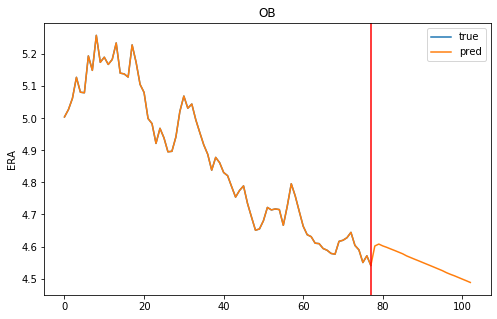

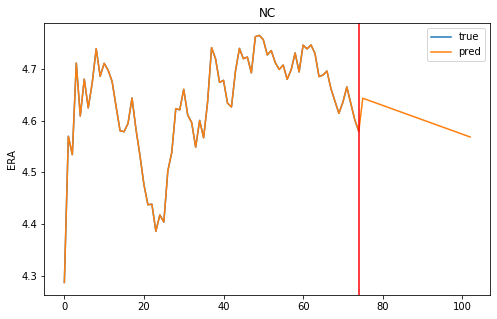

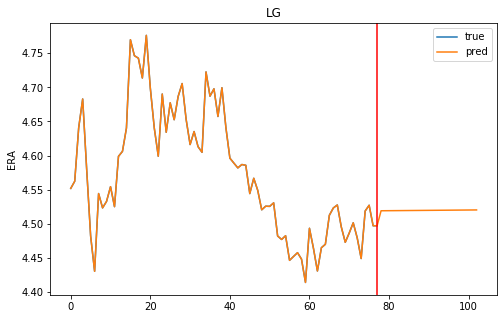

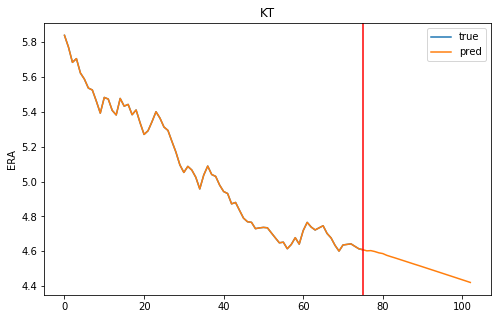

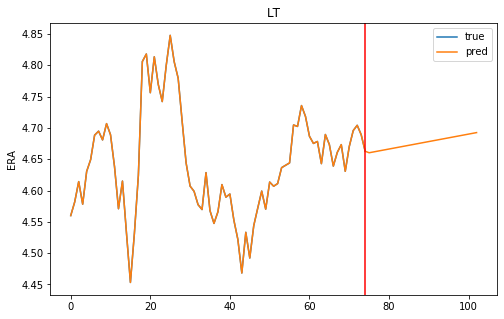

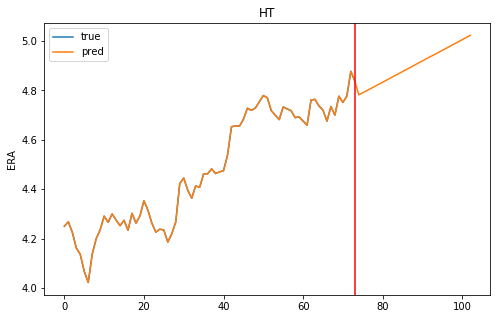

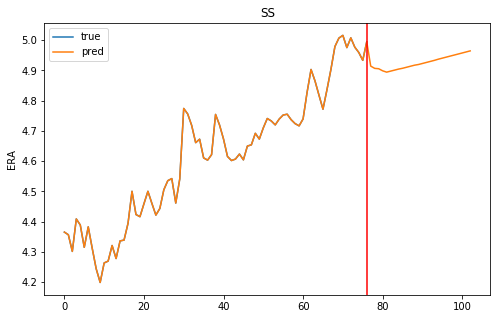

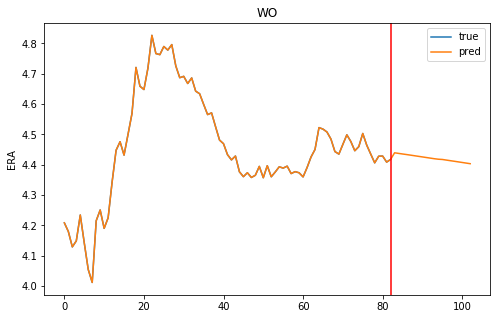

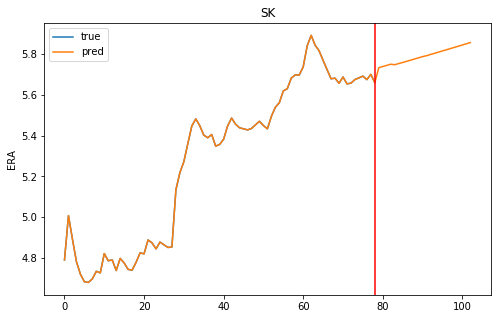

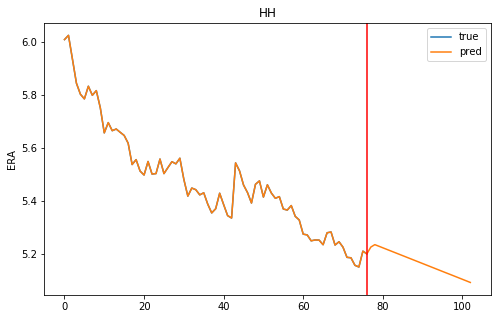

In [34]:
for i in ERA_TOTAL('20').index:
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(vars()['ERA_MEAN_'+i]['ERA'], label='true')
    ax.plot(vars()['ERA_MEAN_'+i]['ERA(mean)'], label='pred')
    ax.axvline(num_play[i][0]-41, color='red')
    ax.legend()
    ax.set_title(i)
    ax.set_ylabel('ERA')
    plt.show()

## 타율 회귀

In [35]:
def h_long_function(data):
    team = data.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
    df = pd.DataFrame()
    for i in range(len(team)):
        num = num_play[team[i]][1]
        tmp = data.loc[data['T_ID']==team[i]].reset_index(drop=True)
        tmp = tmp.loc[:num+2]
        tmp['CUM_HIT'] = tmp['HIT'].cumsum()
        tmp['CUM_AB'] = tmp['AB'].cumsum()
        tmp['CUM_AVG']= tmp['CUM_HIT'] / tmp['CUM_AB']
        df = pd.concat([df,tmp])
    df=df.sort_values(by=['G_ID'], axis=0).reset_index(drop=True)
    return(df)

def h_int_function(data):
    team = data.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
    df = pd.DataFrame()
    for i in range(len(team)):
        start = num_play[team[i]][0]
        end = num_play[team[i]][1]
        tmp = data.loc[data['T_ID']==team[i]].reset_index(drop=True)
        tmp = tmp.loc[start+1:end+1]
        tmp['CUM_HIT'] = tmp['HIT'].cumsum()
        tmp['CUM_AB'] = tmp['AB'].cumsum()
        tmp['CUM_AVG']= tmp['CUM_HIT'] / tmp['CUM_AB']
        df = pd.concat([df,tmp])
    df=df.sort_values(by=['G_ID'], axis=0).reset_index(drop=True)
    return(df)

def h_short_function(data):
    team = data.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
    df = pd.DataFrame()
    for i in range(len(team)):
        num = num_play[team[i]][0]
        tmp = data.loc[data['T_ID']==team[i]].reset_index(drop=True)
        tmp = tmp.loc[:num]
        tmp['CUM_HIT'] = tmp['HIT'].cumsum()
        tmp['CUM_AB'] = tmp['AB'].cumsum()
        tmp['CUM_AVG']= tmp['CUM_HIT'] / tmp['CUM_AB']
        df = pd.concat([df,tmp])
    df=df.sort_values(by=['G_ID'], axis=0).reset_index(drop=True)
    return(df)

In [36]:
h_long19 = h_long_function(thit19) # long경기
h_int19 = h_int_function(thit19) # 잔여경기
h_short19 = h_short_function(thit19) # short경기

h_long18 = h_long_function(thit18) # long경기
h_int18 = h_int_function(thit18) # 잔여경기
h_short18 = h_short_function(thit18) # short경기

h_long17 = h_long_function(thit17) # long경기
h_int17 = h_int_function(thit17) # 잔여경기
h_short17 = h_short_function(thit17) # short경기

h_long16 = h_long_function(thit16) # long경기
h_int16 = h_int_function(thit16) # 잔여경기
h_short16 = h_short_function(thit16) # short경기

In [37]:
def h_long_check(data):
    team = data.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
    a=[]
    for i in range(len(team)):
        tmp = data.loc[data['T_ID']==team[i]].reset_index(drop=True)
        val = tmp.loc[tmp.shape[0]-1, ['CUM_AVG']].values
        a = np.append(a,val)

    df = pd.DataFrame(a)
    df.index = team
    df.columns = ['long']
    return(df)

def h_int_check(data):
    team = data.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
    a=[]
    for i in range(len(team)):
        tmp = data.loc[data['T_ID']==team[i]].reset_index(drop=True)
        val = tmp.loc[tmp.shape[0]-1, ['CUM_AVG']].values
        a = np.append(a,val)
    
    df = pd.DataFrame(a)
    df.index = team
    df.columns = ['true']
    return(df)

def h_short_check(data):
    team = data.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
    a=[]
    for i in range(len(team)):
        tmp = data.loc[data['T_ID']==team[i]].reset_index(drop=True)
        val = tmp.loc[tmp.shape[0]-1, ['CUM_AVG']].values
        a = np.append(a,val)

    df = pd.DataFrame(a)
    df.index = team
    df.columns = ['short']
    return(df)

In [38]:
h_check_19 = pd.concat([h_long_check(h_long19),h_int_check(h_int19),h_short_check(h_short19)],axis=1)
h_check_18 = pd.concat([h_long_check(h_long18),h_int_check(h_int18),h_short_check(h_short18)],axis=1)
h_check_17 = pd.concat([h_long_check(h_long17),h_int_check(h_int17),h_short_check(h_short17)],axis=1)
h_check_16 = pd.concat([h_long_check(h_long16),h_int_check(h_int16),h_short_check(h_short16)],axis=1)

In [39]:
final_check_hit = pd.concat([h_check_19,h_check_18,h_check_17,h_check_16],axis=0)
h_X = final_check_hit[['long','short']]
h_y = final_check_hit['true']
lr_hit = LinearRegression()
lr_hit.fit(h_X,h_y)
final_check_hit['pred'] = lr_hit.predict(h_X)

In [40]:
#h_X_pred = AVG_TOTAL('20')[['AVG_pred(end)','AVG_pred(start)']]
#h_result = pd.DataFrame(lr_hit.predict(h_X_pred),index = h_X_pred.index, columns=['RESULT'])
#h_result

In [41]:
h_X_pred = pd.concat([AVG_TOTAL2[['AVG(mean)']],AVG_TOTAL('20')[['AVG_pred(start)']]],axis=1)
h_result = pd.DataFrame(lr_hit.predict(h_X_pred),index = h_X_pred.index, columns=['RESULT'])
h_result.columns=['AVG']
h_result

,AVG
OB,0.261900
NC,0.273962
LG,0.271062
KT,0.253745
LT,0.256284
HT,0.234320
SS,0.260174
WO,0.275992
SK,0.208708
HH,0.232282


In [42]:
h_result.to_csv('AVG.csv', index=False)

# 방어율 회귀

In [43]:
def p_long_function(data):
    team = data.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
    df = pd.DataFrame()
    for i in range(len(team)):
        num = num_play[team[i]][1]
        tmp = data.loc[data['T_ID']==team[i]].reset_index(drop=True)
        tmp['CUM_ER'] = tmp['ER'].cumsum()
        tmp['CUM_INN2'] = tmp['INN2'].cumsum()
        tmp['CUM_ERR']= 9 * tmp['CUM_ER'] / (tmp['CUM_INN2'] / 3)
        tmp = tmp.loc[:num+2,['G_ID','T_ID','CUM_ERR']].reset_index(drop=True)
        df = pd.concat([df,tmp]).reset_index(drop=True)
    df=df.sort_values(by=['G_ID'], axis=0).reset_index(drop=True)
    return(df)

def p_int_function(data):
    team = data.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
    df = pd.DataFrame()
    for i in range(len(team)):
        start = num_play[team[i]][0]
        end = num_play[team[i]][1]
        tmp = data.loc[data['T_ID']==team[i]].reset_index(drop=True)
        tmp = tmp.loc[start+1:end+1]
        tmp['CUM_ER'] = tmp['ER'].cumsum()
        tmp['CUM_INN2'] = tmp['INN2'].cumsum()
        tmp['CUM_ERR']= 9 * tmp['CUM_ER'] / (tmp['CUM_INN2'] / 3)
        df = pd.concat([df,tmp]).reset_index(drop=True)
    df=df.sort_values(by=['G_ID'], axis=0).reset_index(drop=True)
    return(df)

def p_short_function(data):
    team = data.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
    df = pd.DataFrame()
    for i in range(len(team)):
        num = num_play[team[i]][0]
        tmp = data.loc[data['T_ID']==team[i]].reset_index(drop=True)
        tmp = tmp.loc[:num]
        tmp['CUM_ER'] = tmp['ER'].cumsum()
        tmp['CUM_INN2'] = tmp['INN2'].cumsum()
        tmp['CUM_ERR']= 9 * tmp['CUM_ER'] / (tmp['CUM_INN2'] / 3)
        df = pd.concat([df,tmp]).reset_index(drop=True)
    df=df.sort_values(by=['G_ID'], axis=0).reset_index(drop=True)
    return(df)

In [44]:
p_long19 = p_long_function(tpit19) # long경기
p_int19 = p_int_function(tpit19) # 잔여경기
p_short19 = p_short_function(tpit19) # short경기

p_long18 = p_long_function(tpit18) # long경기
p_int18 = p_int_function(tpit18) # 잔여경기
p_short18 = p_short_function(tpit18) # short경기

p_long17 = p_long_function(tpit17) # long경기
p_int17 = p_int_function(tpit17) # 잔여경기
p_short17 = p_short_function(tpit17) # short경기

p_long16 = p_long_function(tpit16) # long경기
p_int16 = p_int_function(tpit16) # 잔여경기
p_short16 = p_short_function(tpit16) # short경기

In [45]:
def p_int_check(data):
    team = data.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
    a=[]
    for i in range(len(team)):
        tmp = data.loc[data['T_ID']==team[i]].reset_index(drop=True)
        val = tmp.loc[tmp.shape[0]-1, ['CUM_ERR']].values
        a = np.append(a,val)
    
    df = pd.DataFrame(a)
    df.index = team
    df.columns = ['true']
    return(df)
    
def p_short_check(data):
    team = data.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
    a=[]
    for i in range(len(team)):
        tmp = data.loc[data['T_ID']==team[i]].reset_index(drop=True)
        val = tmp.loc[tmp.shape[0]-1, ['CUM_ERR']].values
        a = np.append(a,val)

    df= pd.DataFrame(a)
    df.index = team
    df.columns = ['short']
    return(df)

def p_long_check(data):
    team = data.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
    a=[]
    for i in range(len(team)):
        tmp = data.loc[data['T_ID']==team[i]].reset_index(drop=True)
        val = tmp.loc[tmp.shape[0]-1, ['CUM_ERR']].values
        a = np.append(a,val)

    df = pd.DataFrame(a)
    df.index = team
    df.columns = ['long']
    return(df)

In [46]:
p_check_19 = pd.concat([p_long_check(p_long19),p_int_check(p_int19),p_short_check(p_short19)],axis=1)
p_check_18 = pd.concat([p_long_check(p_long18),p_int_check(p_int18),p_short_check(p_short18)],axis=1)
p_check_17 = pd.concat([p_long_check(p_long17),p_int_check(p_int17),p_short_check(p_short17)],axis=1)
p_check_16 = pd.concat([p_long_check(p_long16),p_int_check(p_int16),p_short_check(p_short16)],axis=1)

In [47]:
# 19, 18, 17, 16 데이터 가지고 회귀모형
final_check_pit = pd.concat([p_check_19,p_check_18,p_check_17,p_check_16],axis=0)
p_X = final_check_pit[['long','short']]
p_y = final_check_pit['true']
lr_pit = LinearRegression()
lr_pit.fit(p_X,p_y)
final_check_pit['pred'] = lr_pit.predict(p_X)

In [48]:
# p_X_pred = ERA_TOTAL('20')[['ERA_pred(end)','ERA_pred(start)']]
# p_result = pd.DataFrame(lr_pit.predict(p_X_pred), index = p_X_pred.index, columns=['RESULT'])
# p_result

In [49]:
p_X_pred = pd.concat([ERA_TOTAL2[['ERA(mean)']],ERA_TOTAL('20')[['ERA_pred(start)']]], axis=1)
p_result = pd.DataFrame(lr_pit.predict(p_X_pred), index = p_X_pred.index, columns=['RESULT'])
p_result.columns=['ERA']
p_result

,ERA
OB,4.242764
NC,4.520330
LG,4.628628
KT,3.550776
LT,4.835996
HT,5.893508
SS,4.836476
WO,4.335824
SK,6.803423
HH,4.607025


In [50]:
p_result.to_csv('ERA.csv', index=False)

# 승률모형

In [51]:
def pfunction(data):
    WLS = {'W':1, 'L':0, 'D':0}
    f = lambda x: WLS.get(x, x)
    data['WLS'] = data['WLS'].map(f)
    team = data.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
    df = pd.DataFrame()
    for i in range(len(team)):
        tmp = data.loc[data['T_ID']==team[i]].reset_index(drop=True)
        tmp['CUM_WLS'] = data.loc[data['T_ID']==team[i], 'WLS'].cumsum().reset_index(drop=True)
        l = tmp.shape[0]
        tmp['ROUND'] = range(1, l+1)
        tmp['W_RATE'] = tmp['CUM_WLS'] / tmp['ROUND']
        tmp['CUM_ER'] = tmp['ER'].cumsum()
        tmp['CUM_INN2'] = tmp['INN2'].cumsum()
        tmp['CUM_ERR']= 9 * tmp['CUM_ER'] / (tmp['CUM_INN2']/ 3)
        five = tmp['WLS'].values[0:5]
        for j in range(5,l):
            five = np.append(five,tmp['WLS'].values[j-5:j].sum())
        tmp['five']=five/5
        tmp = tmp.loc[40:,['G_ID','T_ID','W_RATE','CUM_ERR','five','WLS','CUM_WLS']].reset_index(drop=True)
        df = pd.concat([df,tmp]).reset_index(drop=True)
    df=df.sort_values(by=['G_ID'], axis=0).reset_index(drop=True)
    return(df)

def hfunction(data):
    team = data.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
    df = pd.DataFrame()
    for i in range(len(team)):
        tmp = data.loc[data['T_ID']==team[i]].reset_index(drop=True)
        tmp['CUM_HIT'] = tmp['HIT'].cumsum()
        tmp['CUM_AB'] = tmp['AB'].cumsum()
        tmp['CUM_AVG']= tmp['CUM_HIT'] / tmp['CUM_AB']
        tmp = tmp.loc[40:,['G_ID','T_ID','CUM_AVG']]
        df = pd.concat([df,tmp])
    df=df.sort_values(by=['G_ID'], axis=0).reset_index(drop=True)
    return(df)

In [52]:
pit19 = pfunction(tpit19)
pit20 = pfunction(tpit20)
hit19 = hfunction(thit19)
hit20 = hfunction(thit20)
pit = pd.concat([pit19,pit20]).reset_index(drop=True)
hit = pd.concat([hit19,hit20]).reset_index(drop=True)

WLS_train = pd.merge(pit,hit)
WLS_X = WLS_train[['CUM_AVG','CUM_ERR','five']]
WLS_y = WLS_train['W_RATE']

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(WLS_X)
WLS_X = scaler.transform(WLS_X)

In [54]:
from sklearn.model_selection import train_test_split
WLS_X_train, WLS_X_test = train_test_split(WLS_X,test_size=0.2,random_state=34)
WLS_y_train, WLS_y_test = train_test_split(WLS_y,test_size=0.2, random_state=34)

In [55]:
WLS_rf = RandomForestRegressor(random_state=123)
WLS_rf.fit(WLS_X_train,WLS_y_train)
WLS_rf.score(WLS_X_test,WLS_y_test)

0.89295788961723

In [56]:
sam1 = pd.concat([AVG_MEAN_OB.iloc[AVG_MEAN_OB.index[-1] - (num_play['OB'][1]-num_play['OB'][0]):AVG_MEAN_OB.index[-1]+1,4],ERA_MEAN_OB.iloc[ERA_MEAN_OB.index[-1] - (num_play['OB'][1]-num_play['OB'][0]):ERA_MEAN_OB.index[-1]+1,4]],axis=1)
sam1['T_ID']='OB'
sam2 = pd.concat([AVG_MEAN_HH.iloc[AVG_MEAN_HH.index[-1] - (num_play['HH'][1]-num_play['HH'][0]):AVG_MEAN_HH.index[-1]+1,4],ERA_MEAN_HH.iloc[ERA_MEAN_HH.index[-1] - (num_play['HH'][1]-num_play['HH'][0]):ERA_MEAN_HH.index[-1]+1,4]],axis=1)
sam2['T_ID']='HH'
sam3 = pd.concat([AVG_MEAN_SK.iloc[AVG_MEAN_SK.index[-1] - (num_play['SK'][1]-num_play['SK'][0]):AVG_MEAN_SK.index[-1]+1,4],ERA_MEAN_SK.iloc[ERA_MEAN_SK.index[-1] - (num_play['SK'][1]-num_play['SK'][0]):ERA_MEAN_SK.index[-1]+1,4]],axis=1)
sam3['T_ID']='SK'
sam4 = pd.concat([AVG_MEAN_KT.iloc[AVG_MEAN_KT.index[-1] - (num_play['KT'][1]-num_play['KT'][0]):AVG_MEAN_KT.index[-1]+1,4],ERA_MEAN_KT.iloc[ERA_MEAN_KT.index[-1] - (num_play['KT'][1]-num_play['KT'][0]):ERA_MEAN_KT.index[-1]+1,4]],axis=1)
sam4['T_ID']='KT'
sam5 = pd.concat([AVG_MEAN_LG.iloc[AVG_MEAN_LG.index[-1] - (num_play['LG'][1]-num_play['LG'][0]):AVG_MEAN_LG.index[-1]+1,4],ERA_MEAN_LG.iloc[ERA_MEAN_LG.index[-1] - (num_play['LG'][1]-num_play['LG'][0]):ERA_MEAN_LG.index[-1]+1,4]],axis=1)
sam5['T_ID']='LG'
sam6 = pd.concat([AVG_MEAN_HT.iloc[AVG_MEAN_HT.index[-1] - (num_play['HT'][1]-num_play['HT'][0]):AVG_MEAN_HT.index[-1]+1,4],ERA_MEAN_HT.iloc[ERA_MEAN_HT.index[-1] - (num_play['HT'][1]-num_play['HT'][0]):ERA_MEAN_HT.index[-1]+1,4]],axis=1)
sam6['T_ID']='HT'
sam7 = pd.concat([AVG_MEAN_NC.iloc[AVG_MEAN_NC.index[-1] - (num_play['NC'][1]-num_play['NC'][0]):AVG_MEAN_NC.index[-1]+1,4],ERA_MEAN_NC.iloc[ERA_MEAN_NC.index[-1] - (num_play['NC'][1]-num_play['NC'][0]):ERA_MEAN_NC.index[-1]+1,4]],axis=1)
sam7['T_ID']='NC'
sam8 = pd.concat([AVG_MEAN_SS.iloc[AVG_MEAN_SS.index[-1] - (num_play['SS'][1]-num_play['SS'][0]):AVG_MEAN_SS.index[-1]+1,4],ERA_MEAN_SS.iloc[ERA_MEAN_SS.index[-1] - (num_play['SS'][1]-num_play['SS'][0]):ERA_MEAN_SS.index[-1]+1,4]],axis=1)
sam8['T_ID']='SS'
sam9 = pd.concat([AVG_MEAN_LT.iloc[AVG_MEAN_LT.index[-1] - (num_play['LT'][1]-num_play['LT'][0]):AVG_MEAN_LT.index[-1]+1,4],ERA_MEAN_LT.iloc[ERA_MEAN_LT.index[-1] - (num_play['LT'][1]-num_play['LT'][0]):ERA_MEAN_LT.index[-1]+1,4]],axis=1)
sam9['T_ID']='LT'
sam10 = pd.concat([AVG_MEAN_WO.iloc[AVG_MEAN_WO.index[-1] - (num_play['WO'][1]-num_play['WO'][0]):AVG_MEAN_WO.index[-1]+1,4],ERA_MEAN_WO.iloc[ERA_MEAN_WO.index[-1] - (num_play['WO'][1]-num_play['WO'][0]):ERA_MEAN_WO.index[-1]+1,4]],axis=1)
sam10['T_ID']='WO'

gogo = pd.concat([sam1,sam2,sam3,sam4,sam5,sam6,sam7,sam8,sam9,sam10]).reset_index(drop=True)

In [57]:
#  잔여경기 WLS로 계산
team = gogo.sort_values(by=['T_ID'],axis=0)['T_ID'].unique()
please = pd.DataFrame()
for i in range(len(team)):
    tmp = gogo.loc[gogo['T_ID']==team[i]]
    a = list(tmp['AVG(mean)'])
    b = list(tmp['ERA(mean)'])
    WLS = list(WLS_train.loc[WLS_train['T_ID']==team[i]].tail(5)['WLS'])
    pre = list(WLS_train.loc[WLS_train['T_ID']==team[i]].tail(1)['W_RATE'])
    for k in range(len(a)):
        df_WLS = pd.DataFrame(WLS[k:k+5])
        add = list(df_WLS.sum())
        df = pd.DataFrame([a[k], b[k],add[0]/5]).transpose()
        df.columns = ['CUM_AVG','CUM_ERR','five']
        df = scaler.transform(df)
        res = list(WLS_rf.predict(df))
        if res > pre:
            WLS.append(1)
        else:
            WLS.append(0)
        pre = res
    denominator = pd.DataFrame([len(WLS[5:])]).reset_index(drop=True)
    numerator = pd.DataFrame(WLS[5:]).cumsum().tail(1).reset_index(drop=True)
    fin = numerator / denominator
    please = pd.concat([please,fin])

please.index = team
please.columns=['W_RATE']
please

,W_RATE
HH,0.269231
HT,0.413793
KT,0.555556
LG,0.440000
LT,0.571429
NC,0.250000
OB,0.600000
SK,0.250000
SS,0.538462
WO,0.550000


In [58]:
please.to_csv('W_RATE.csv', index=False)